In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TRAIN_PATH = '/home/marcin/git_workspace/roads_semantic_segmentation_in_LandCover.ai_dataset/data/processed/train'
img_name = 'N-34-140-A-d-4-2_310.jpg'
mask_name = 'N-34-140-A-d-4-2_310_m.png'

IMG_PATH = '{}/{}'.format(TRAIN_PATH, img_name)
MASK_PATH = '{}/{}'.format(TRAIN_PATH, mask_name)

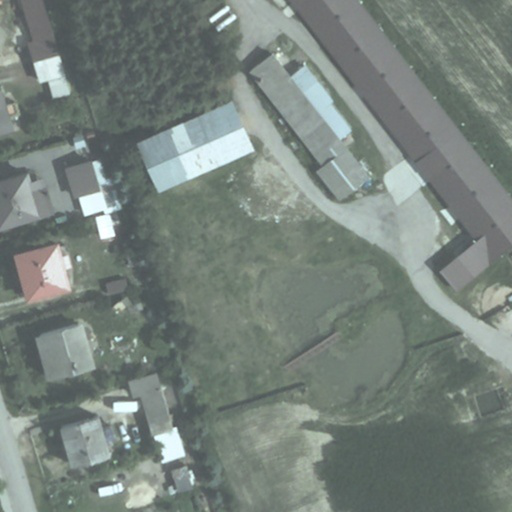

In [3]:
image = Image.open(IMG_PATH)
image

In [4]:
image.size

(512, 512)

In [5]:
mask = Image.open(MASK_PATH)
mask_array = np.array(mask)
mask_array.shape

(512, 512, 3)

In [6]:
# for w in range(512):
    
#     for h in range(512):

#         print('{} for w = {} and h = {}'.format(mask_array[w, h, :], w, h))

four classes:
**building (1), woodland (2), water (3), and road (4)**

In [7]:
mask_array[1,15:25,:]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [8]:
mask_array[1,:,1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
img_array = np.array(image)

In [10]:
for w in range(512):
    
    for h in range(512):
        
        # background (not classified to any class)
        if mask_array[w, h, 0] == 0:
            mask_array[w, h, :] = [0, 0, 0]  # black
        
        # buildings
        elif mask_array[w, h, 0] == 1:
            mask_array[w, h, :] = [0, 0, 255]  # blue
        
        # woodland
        elif mask_array[w, h, 0] == 2:
            mask_array[w, h, :] = [0, 255, 0]  # green
        
        # water
        elif mask_array[w, h, 0] == 3:
            mask_array[w, h, :] = [255, 0, 0]  # red
        
        # roads
        elif mask_array[w, h, 0] == 4:
            mask_array[w, h, :] = [255, 255, 255]  # white
        

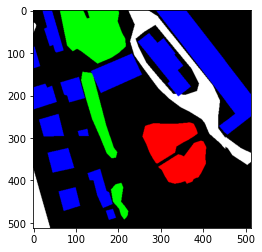

In [11]:
plt.imshow(mask_array)
plt.show()

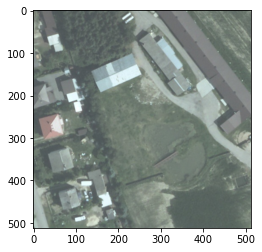

In [12]:
plt.imshow(img_array)

In [13]:
img_array.shape

(512, 512, 3)

In [ ]:
class_names = []

for c in range(len(class_names)):
        mask = tf.equal(annotation[:,:,0], tf.constant(c))
        stack_list.append(tf.cast(mask, dtype=tf.int32))

annotation = tf.stack(stack_list, axis=2)